In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

from statsmodels.tsa.stattools import adfuller

In [2]:
# load dataset

dataset = pd.read_csv('AirPassengers.csv')

dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# convert Month (int string) to DateTIme format

dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)

C:\Users\mohdz\AppData\Local\Temp\ipykernel_25004\4062685315.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)


In [4]:
# Index Month

indexed_data = dataset.set_index(['Month'])

indexed_data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


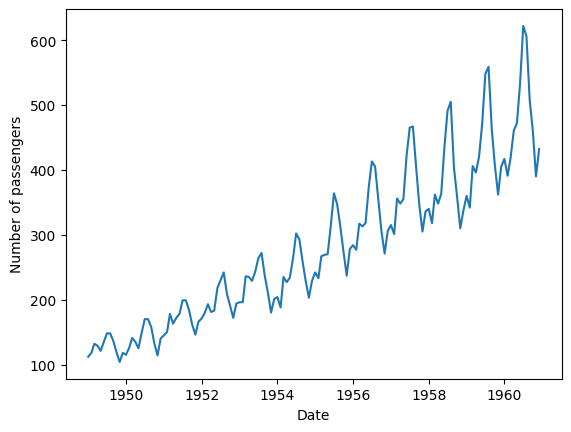

In [5]:
# plot the data

plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.plot(indexed_data)

In [6]:
# calculate rolling mean and standard deviation

rolmean = indexed_data.rolling(window=12).mean()
rolstd = indexed_data.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


In [7]:
def check_stationarity(timeseries):

    #Determine rolling statistics
    movingavg = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingavg, color='red', label='Rolling Mean')
    plt.plot(movingstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    airpass_test = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in airpass_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

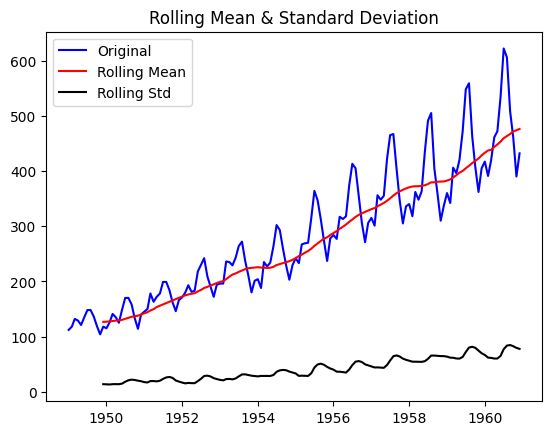

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [8]:
# check for stationarity
check_stationarity(indexed_data)

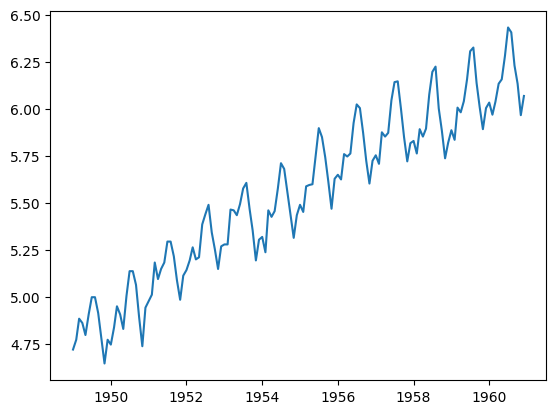

In [9]:
# from above plot we can conclude that data is not stationary
# hence perform data transformation to achive stationarity

# perform log transformation

indexed_data_logscale = np.log(indexed_data)
plt.plot(indexed_data_logscale)

In [10]:
len(indexed_data_logscale)

144

In [11]:
indexed_data_logscale.isnull().sum()

#Passengers    0
dtype: int64

In [12]:
# rolling mean and std

moving_avg = indexed_data_logscale.rolling(window=12).mean()
moving_std = indexed_data_logscale.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean (Logarithmic Scale)')

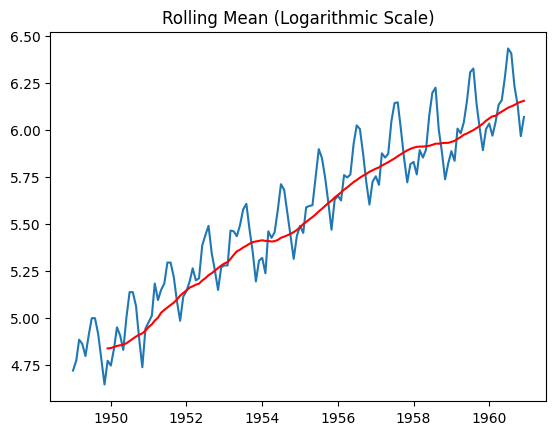

In [13]:
plt.plot(indexed_data_logscale, label='Original')
plt.plot(moving_avg, color='red', label='Rolling Mean')
plt.title('Rolling Mean (Logarithmic Scale)')

In [14]:
# from above plot, mean is not stationary, varies with time

# to make it stationary

dataset_log_minus_moving_avg = indexed_data_logscale - moving_avg
dataset_log_minus_moving_avg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [15]:
len(dataset_log_minus_moving_avg)

144

In [16]:
# remove null

dataset_log_minus_moving_avg.dropna(inplace=True)
dataset_log_minus_moving_avg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


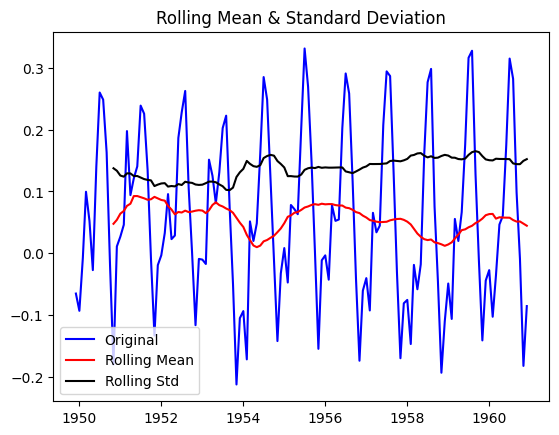

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [17]:
check_stationarity(dataset_log_minus_moving_avg)

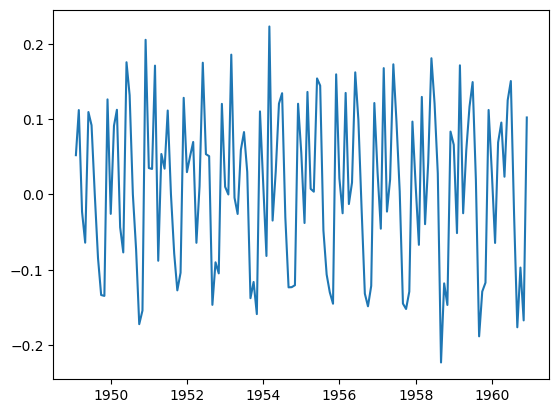

In [18]:
indexed_data_logscale_dif = indexed_data_logscale - indexed_data_logscale.shift()

plt.plot(indexed_data_logscale_dif)

In [19]:
# remove null values
indexed_data_logscale_dif.dropna(inplace=True)

In [20]:
len(indexed_data_logscale_dif)

143

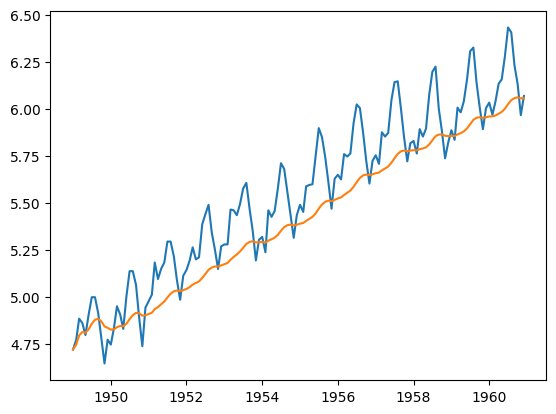

In [21]:
#
exponential_decay_weighted_avg = indexed_data_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexed_data_logscale)
plt.plot(exponential_decay_weighted_avg)

In [22]:
len(exponential_decay_weighted_avg)

144

In [23]:
# import libraries for arima model

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [24]:
decomposition = seasonal_decompose(indexed_data_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

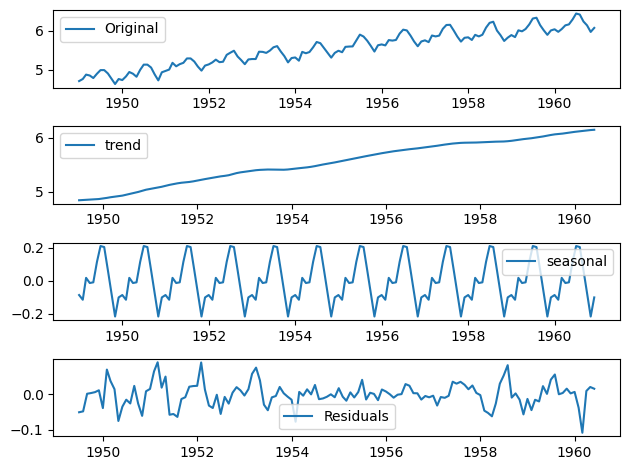

In [25]:

plt.subplot(411)
plt.plot(indexed_data_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)

plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)

plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)

plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [26]:
# plot acf and pacf  to find the value of p and q

lag_acf = acf(indexed_data_logscale_dif, nlags=5)
lag_pacf = pacf(indexed_data_logscale_dif,  nlags=5, method = 'ols')  #default is  yw = Yule Walker, ols = ordinary least squares.

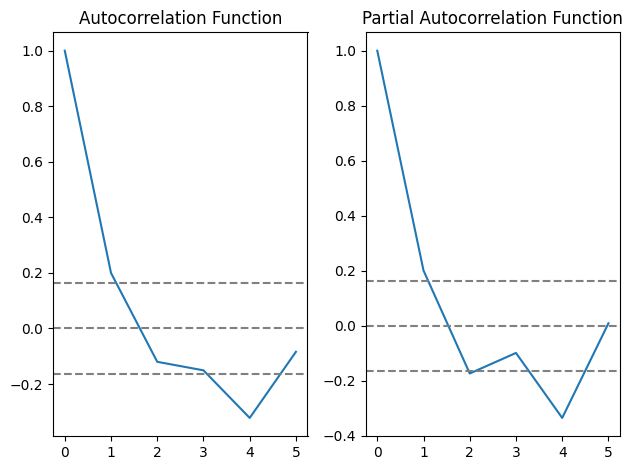

In [27]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexed_data_logscale_dif)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexed_data_logscale_dif)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexed_data_logscale_dif)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexed_data_logscale_dif)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

From above acf,
      we can say that, Moving average component Q = 2   (1.9)

From pacf,
     we can say that, Auto Regressive   component P = 2   (1.6)


In [28]:
indexed_data_logscale.interpolate(inplace=True)
# interpolate  dropna
len(indexed_data_logscale)

144

C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS:nan')

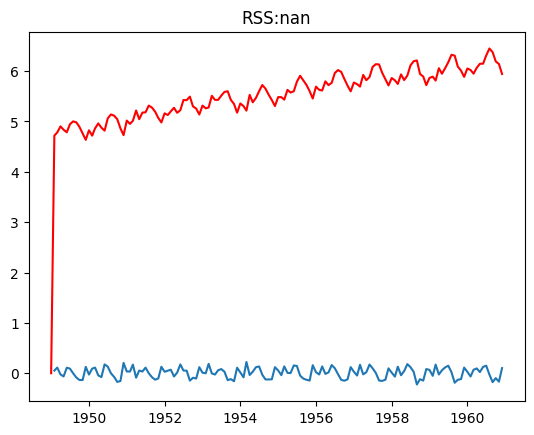

In [29]:
#AR Model

model1 = ARIMA(indexed_data_logscale, order=(2,1,0))   #order=(p,d,q)
results1 = model1.fit()
plt.plot(indexed_data_logscale_dif)
plt.plot(results1.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results1.fittedvalues - indexed_data_logscale_dif['#Passengers'])))

C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

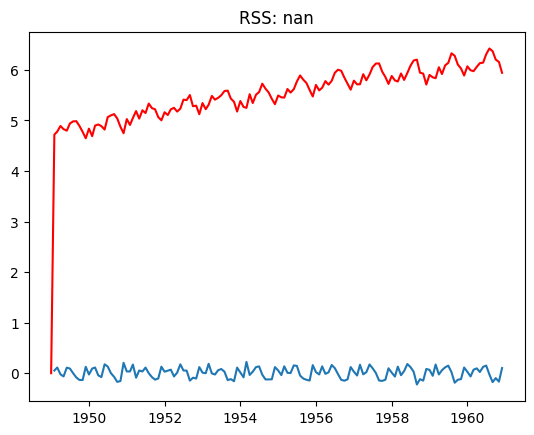

In [30]:
# MA model

model2 = ARIMA(indexed_data_logscale, order=(0,1,2))
result2 = model2.fit()
plt.plot(indexed_data_logscale_dif)
plt.plot(result2.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((result2.fittedvalues - indexed_data_logscale_dif['#Passengers'])))

C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

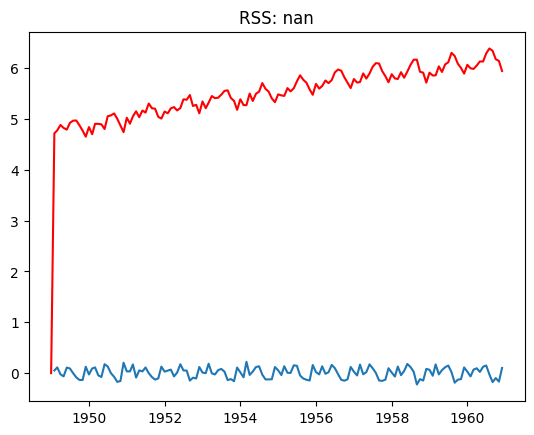

In [31]:
model = ARIMA(indexed_data_logscale, order=(2,1,2))
results = model.fit()
plt.plot(indexed_data_logscale_dif)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results.fittedvalues - indexed_data_logscale_dif['#Passengers'])))

In [32]:
pred_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
pred_ARIMA_diff.head()

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824423
dtype: float64